In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

from modules import f1_metric

In [2]:
# Check for GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Check TensorFlow version
print("TensorFlow Version: ", tf.__version__)

# Check if GPU is used by TensorFlow
print("GPU in use: ", tf.config.list_physical_devices('GPU'))

Num GPUs Available:  0
TensorFlow Version:  2.15.0
GPU in use:  []


### **Read Data**

In [3]:
df = pd.read_csv("E:/vindr_mammo/Data/full_df.csv")
df

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,split
0,9bab34fb6637f3921df32b4a215385ed,e3531910704e16940109920a082a44c0,cae99f03d6140de07f07aefb4cd56894,L,CC,3518,2800,BI-RADS 1,DENSITY A,training
1,c56cc50b66e5dec5669109775a6e86b1,fc2a541686a034dcee5210351421281f,b006f3d0f9d31b9f5b2bff0590bc9329,L,CC,2812,2012,BI-RADS 1,DENSITY A,training
2,68b4c3418c32a4ceded51336795166d8,f7fb64af935152315c2712e0073cf8cd,296b49445da9a1c1cd74309803fb1231,L,CC,3518,2800,BI-RADS 1,DENSITY A,training
3,968fd0c76a33137d8c227041ea728bf6,f3de135bea9911aa421a4b51bab4c0d1,c89a8dd3fc80a4927de00ada5668293f,L,CC,3518,2800,BI-RADS 1,DENSITY A,training
4,c488d7ef379be78343fd91eefa9cc477,f70111ca12d8c3650bdb048138e3d3c5,bac4fa932577504e96b0502fcfd600e5,L,CC,2812,2012,BI-RADS 1,DENSITY A,training
...,...,...,...,...,...,...,...,...,...,...
15999,5e9175554fa9d6b9fb424d7065be4f20,a07d1cc99c7611c815ea99acb324f3b6,4adfc32f03228403f518f24e9b9313cf,R,MLO,3518,2800,BI-RADS 1,DENSITY C,test
16000,bbe97d67cc7f0d28bf9860a864af684a,3dad6ed9f9682dfbb924407f407eaf12,4835a79d7e25eebd20104e7147cbcfb4,L,CC,3518,2800,BI-RADS 2,DENSITY C,test
16001,bbe97d67cc7f0d28bf9860a864af684a,3dad6ed9f9682dfbb924407f407eaf12,ebb437593a3fc80277296638f0607f5b,L,MLO,3518,2800,BI-RADS 2,DENSITY C,test
16002,bbe97d67cc7f0d28bf9860a864af684a,3dad6ed9f9682dfbb924407f407eaf12,9188a01b6b648cee39fb70702a860141,R,CC,3518,2800,BI-RADS 1,DENSITY C,test


In [4]:
df['image_path'] = 'E:/vindr_mammo/Data/png/' + df['study_id'] + '/' + df['image_id'] + '.png'
df['label'] = df['breast_birads'].map({'BI-RADS 1': '0',
                                       'BI-RADS 2': '0',
                                       'BI-RADS 3': '1',
                                       'BI-RADS 4': '1',
                                       'BI-RADS 5': '1'})
df

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,split,image_path,label
0,9bab34fb6637f3921df32b4a215385ed,e3531910704e16940109920a082a44c0,cae99f03d6140de07f07aefb4cd56894,L,CC,3518,2800,BI-RADS 1,DENSITY A,training,E:/vindr_mammo/Data/png/9bab34fb6637f3921df32b...,0
1,c56cc50b66e5dec5669109775a6e86b1,fc2a541686a034dcee5210351421281f,b006f3d0f9d31b9f5b2bff0590bc9329,L,CC,2812,2012,BI-RADS 1,DENSITY A,training,E:/vindr_mammo/Data/png/c56cc50b66e5dec5669109...,0
2,68b4c3418c32a4ceded51336795166d8,f7fb64af935152315c2712e0073cf8cd,296b49445da9a1c1cd74309803fb1231,L,CC,3518,2800,BI-RADS 1,DENSITY A,training,E:/vindr_mammo/Data/png/68b4c3418c32a4ceded513...,0
3,968fd0c76a33137d8c227041ea728bf6,f3de135bea9911aa421a4b51bab4c0d1,c89a8dd3fc80a4927de00ada5668293f,L,CC,3518,2800,BI-RADS 1,DENSITY A,training,E:/vindr_mammo/Data/png/968fd0c76a33137d8c2270...,0
4,c488d7ef379be78343fd91eefa9cc477,f70111ca12d8c3650bdb048138e3d3c5,bac4fa932577504e96b0502fcfd600e5,L,CC,2812,2012,BI-RADS 1,DENSITY A,training,E:/vindr_mammo/Data/png/c488d7ef379be78343fd91...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15999,5e9175554fa9d6b9fb424d7065be4f20,a07d1cc99c7611c815ea99acb324f3b6,4adfc32f03228403f518f24e9b9313cf,R,MLO,3518,2800,BI-RADS 1,DENSITY C,test,E:/vindr_mammo/Data/png/5e9175554fa9d6b9fb424d...,0
16000,bbe97d67cc7f0d28bf9860a864af684a,3dad6ed9f9682dfbb924407f407eaf12,4835a79d7e25eebd20104e7147cbcfb4,L,CC,3518,2800,BI-RADS 2,DENSITY C,test,E:/vindr_mammo/Data/png/bbe97d67cc7f0d28bf9860...,0
16001,bbe97d67cc7f0d28bf9860a864af684a,3dad6ed9f9682dfbb924407f407eaf12,ebb437593a3fc80277296638f0607f5b,L,MLO,3518,2800,BI-RADS 2,DENSITY C,test,E:/vindr_mammo/Data/png/bbe97d67cc7f0d28bf9860...,0
16002,bbe97d67cc7f0d28bf9860a864af684a,3dad6ed9f9682dfbb924407f407eaf12,9188a01b6b648cee39fb70702a860141,R,CC,3518,2800,BI-RADS 1,DENSITY C,test,E:/vindr_mammo/Data/png/bbe97d67cc7f0d28bf9860...,0


In [5]:
train_df = df[df['split'] == 'training']

tmp_test_df = df[df['split'] == 'test']
test_df, val_df = train_test_split(tmp_test_df, test_size=0.5, stratify=tmp_test_df['label'], random_state=42)

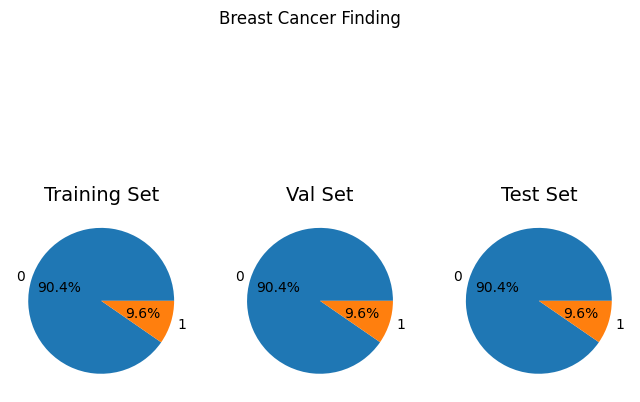

In [6]:
# label distributions
import matplotlib.pyplot as plt
value = train_df['label'].value_counts()
fig, axs = plt.subplots(1, 3, figsize=(8, 6))
fig.suptitle('Breast Cancer Finding')
axs[0].pie(value, labels=value.index, autopct='%1.1f%%')
axs[0].set_title('Training Set', fontsize=14)

# label distributions
value_1 = val_df['label'].value_counts()
axs[1].pie(value_1, labels=value_1.index, autopct='%1.1f%%')
axs[1].set_title('Val Set', fontsize=14)

# label distributions
value_2 = test_df['label'].value_counts()
axs[2].pie(value_2, labels=value_2.index, autopct='%1.1f%%')
axs[2].set_title('Test Set', fontsize=14)

plt.show()

In [7]:
def create_gens(train_df, valid_df, test_df, batch_size):
    '''
    This function takes train, validation, and test dataframe and fit them into image data generator, because model takes data from image data generator.
    Image data generator converts images into tensors.
    '''

    color = 'rgb'
    img_size = (224, 224)

    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))

    tr_gen = ImageDataGenerator(horizontal_flip= True)
    ts_gen = ImageDataGenerator()

    train_gen = tr_gen.flow_from_dataframe(train_df, x_col='image_path', y_col= 'label', target_size=img_size, class_mode= 'categorical',
                                           color_mode= color, shuffle= True, batch_size= batch_size)

    valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col= 'image_path', y_col= 'label', target_size=img_size, class_mode= 'categorical',
                                           color_mode= color, shuffle= True, batch_size= batch_size)

    test_gen = ts_gen.flow_from_dataframe(test_df, x_col= 'image_path', y_col= 'label', target_size=img_size, class_mode= 'categorical',
                                          color_mode= color, shuffle= False, batch_size= test_batch_size)

    return train_gen, valid_gen, test_gen

#### **Visualize Dataset**

In [8]:
batch_size = 16
train_gen, valid_gen, test_gen = create_gens(train_df, val_df, test_df, batch_size)

Found 12004 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.


In [9]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(train_gen.classes), y=train_gen.classes)
class_weights

array([0.55328171, 5.19204152])

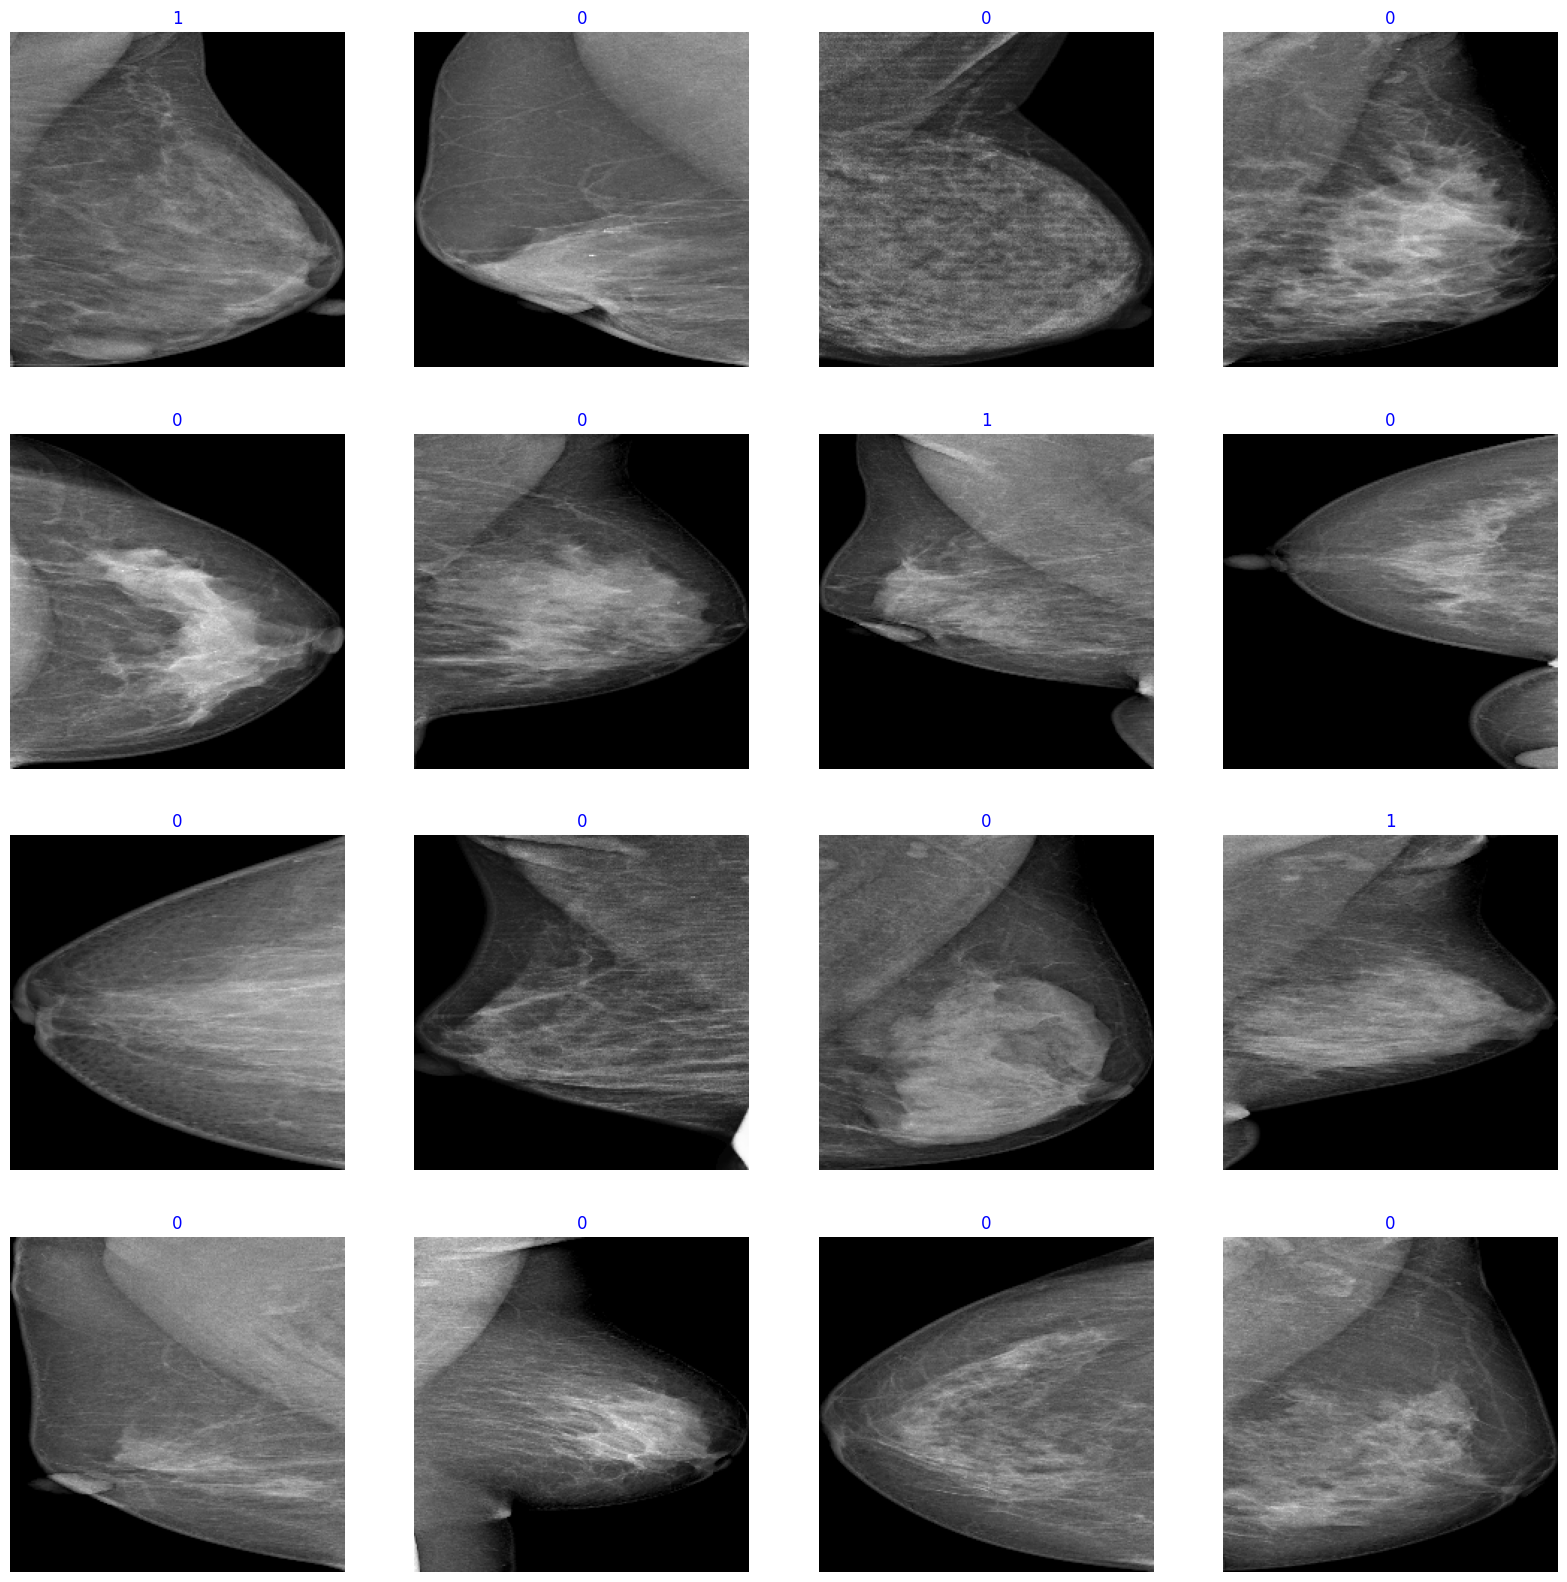

In [10]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
plt.show()

### **Model and metrics**

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

class F1Score(tf.keras.metrics.Metric):
    def __init__(self, threshold=0.5, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.threshold = threshold
        self.true_positives = self.add_weight(name='true_positives', initializer='zeros')
        self.false_positives = self.add_weight(name='false_positives', initializer='zeros')
        self.false_negatives = self.add_weight(name='false_negatives', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(tf.greater_equal(y_pred, self.threshold), tf.float32)

        true_positives = tf.reduce_sum(tf.multiply(y_true, y_pred))
        false_positives = tf.reduce_sum(tf.clip_by_value(y_pred - y_true, 0, 1))
        false_negatives = tf.reduce_sum(tf.clip_by_value(y_true - y_pred, 0, 1))

        self.true_positives.assign_add(true_positives)
        self.false_positives.assign_add(false_positives)
        self.false_negatives.assign_add(false_negatives)

    def result(self):
        precision = self.true_positives / (self.true_positives + self.false_positives + tf.keras.backend.epsilon())
        recall = self.true_positives / (self.true_positives + self.false_negatives + tf.keras.backend.epsilon())
        f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
        return f1

    def reset_state(self):
        self.true_positives.assign(0)
        self.false_positives.assign(0)
        self.false_negatives.assign(0)

In [12]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False,
                                                               weights="imagenet",
                                                               input_shape=img_shape, pooling='max')


model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(512, kernel_regularizer=regularizers.l2(l= 0.016),
               activity_regularizer=regularizers.l1(0.006),
               bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.5, seed= 123),
    Dense(class_count, activation= 'softmax')])

model.compile(Adamax(learning_rate= 0.001),
              loss='categorical_crossentropy',
              metrics= [tf.keras.metrics.FalseNegatives(name='FN'),
                        tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(curve='PR', name='pr_auc'),
                        F1Score(),
                        'accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 4711589 (17.97 MB)
Trainable params: 46

#### **Train model**

In [17]:
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# early_stopping = EarlyStopping(monitor='val_pr_auc', patience=3, mode='max', verbose=1)

# checkpoint_filepath = 'E:/vindr_try/random75_fullsize/output/covid3/best_model.h5'
# model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
#                                    monitor='val_pr_auc',
#                                    save_best_only=True,
#                                    save_weights_only=True,
#                                    mode='max',
#                                    verbose=1)

In [13]:
epochs = 5
history = model.fit(train_gen, epochs=epochs, verbose=1,
                    validation_data= valid_gen,
                    validation_steps=None, shuffle=False,
                    class_weight=dict(enumerate(class_weights)),
                    # callbacks=[early_stopping, model_checkpoint]
                    )

Epoch 1/5

751/751 [==============================] - 1185s 2s/step - loss: 9.2427 - FN: 5412.0000 - recall: 0.5492 - pr_auc: 0.5539 - f1_score: 0.5492 - accuracy: 0.5492 - val_loss: 6.5639 - val_FN: 828.0000 - val_recall: 0.5860 - val_pr_auc: 0.5707 - val_f1_score: 0.5860 - val_accuracy: 0.5860
Epoch 2/5
751/751 [==============================] - 1169s 2s/step - loss: 5.0230 - FN: 4222.0000 - recall: 0.6483 - pr_auc: 0.6444 - f1_score: 0.6483 - accuracy: 0.6483 - val_loss: 3.8745 - val_FN: 393.0000 - val_recall: 0.8035 - val_pr_auc: 0.8279 - val_f1_score: 0.8035 - val_accuracy: 0.8035
Epoch 3/5
751/751 [==============================] - 1152s 2s/step - loss: 3.1443 - FN: 3516.0000 - recall: 0.7071 - pr_auc: 0.6837 - f1_score: 0.7071 - accuracy: 0.7071 - val_loss: 2.4067 - val_FN: 243.0000 - val_recall: 0.8785 - val_pr_auc: 0.8883 - val_f1_score: 0.8785 - val_accuracy: 0.8785
Epoch 4/5
751/751 [==============================] - 1164s 2s/step - loss: 2.0320 - FN: 2753.0000 - recall: 0.7

In [14]:
history.history

{'loss': [9.242696762084961,
  5.022963523864746,
  3.144286632537842,
  2.0320053100585938,
  1.425829291343689],
 'FN': [5412.0, 4222.0, 3516.0, 2753.0, 2819.0],
 'recall': [0.549150288105011,
  0.6482838988304138,
  0.7070976495742798,
  0.7706598043441772,
  0.7651616334915161],
 'pr_auc': [0.5538606643676758,
  0.6443921327590942,
  0.6837158799171448,
  0.7568547129631042,
  0.7621315717697144],
 'f1_score': [0.5491502285003662,
  0.648283839225769,
  0.707097589969635,
  0.7706597447395325,
  0.7651615738868713],
 'accuracy': [0.549150288105011,
  0.6482838988304138,
  0.7070976495742798,
  0.7706598043441772,
  0.7651616334915161],
 'val_loss': [6.563877582550049,
  3.874464750289917,
  2.4067397117614746,
  1.637595772743225,
  1.313225507736206],
 'val_FN': [828.0, 393.0, 243.0, 433.0, 757.0],
 'val_recall': [0.5860000252723694,
  0.8034999966621399,
  0.8784999847412109,
  0.7835000157356262,
  0.6215000152587891],
 'val_pr_auc': [0.5706909894943237,
  0.827893078327179,
  0

In [15]:
# model.save('/kaggle/working/model', save_format='h5', custom_objects={'F1Score': F1Score, 'PrecisionRecallCurve':PrecisionRecallCurve})
model.save_weights('E:/vindr_try/random75_fullsize/output/covid6/model_weights.h5')
val_df.to_csv('E:/vindr_try/random75_fullsize/output/covid6/val_df.csv')
test_df.to_csv('E:/vindr_try/random75_fullsize/output/covid6/test_df.csv')

#### **Display model performance**

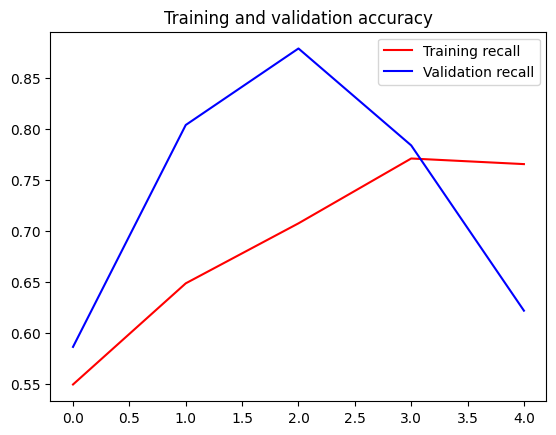

<Figure size 640x480 with 0 Axes>

In [16]:
recall = history.history['recall']
val_recall = history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

f1 = history.history['f1_score']
val_f1 = history.history['val_f1_score']

epochs = range(len(recall))

plt.plot(epochs, recall, 'r', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

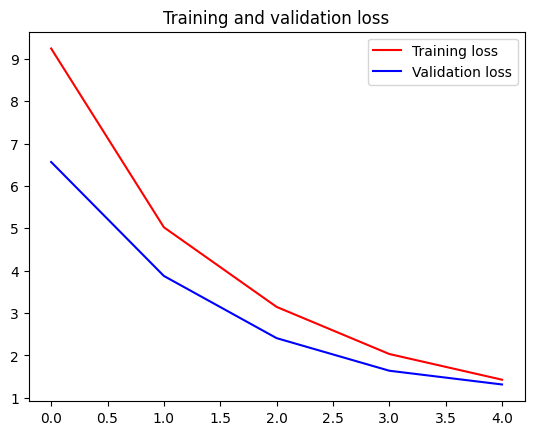

<Figure size 640x480 with 0 Axes>

In [17]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

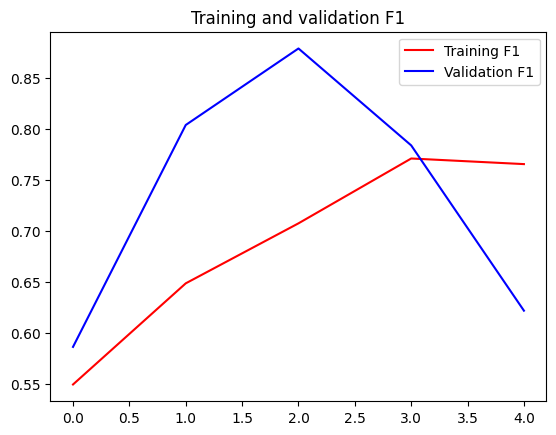

<Figure size 640x480 with 0 Axes>

In [18]:
plt.plot(epochs, f1, 'r', label='Training F1')
plt.plot(epochs, val_f1, 'b', label='Validation F1')
plt.title('Training and validation F1')
plt.legend(loc=0)
plt.figure()

plt.show()

#### **Evaluate model**

In [19]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train PR Curve: ", train_score[1])
print("Train Recall: ", train_score[2])
print("Train Precision: ", train_score[3])
print("Train F1 Score: ", train_score[4])
print("Train Accuracy: ", train_score[5])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation PR Curve: ", valid_score[1])
print("Validation Recall: ", valid_score[2])
print("Validation Precision: ", valid_score[3])
print("Validation F1 Score: ", valid_score[4])
print("Validation Accuracy: ", valid_score[5])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test PR Curve: ", test_score[1])
print("Test Recall: ", test_score[2])
print("Test Precision: ", test_score[3])
print("Test F1 Score: ", test_score[4])
print("Test Accuracy: ", test_score[5])

25/25 [==============================] - 76s 3s/step - loss: 1.3123 - FN: 766.0000 - recall: 0.6170 - pr_auc: 0.6376 - f1_score: 0.6170 - accuracy: 0.6170
Train Loss:  1.277347207069397
Train PR Curve:  138.0
Train Recall:  0.6549999713897705
Train Precision:  0.7164760828018188
Train F1 Score:  0.6549999117851257
Train Accuracy:  0.6549999713897705
--------------------
Validation Loss:  1.3384552001953125
Validation PR Curve:  159.0
Validation Recall:  0.6025000214576721
Validation Precision:  0.6008546352386475
Validation F1 Score:  0.6024999618530273
Validation Accuracy:  0.6025000214576721
--------------------
Test Loss:  1.3122564554214478
Test PR Curve:  766.0
Test Recall:  0.6169999837875366
Test Precision:  0.6376360654830933
Test F1 Score:  0.6169999241828918
Test Accuracy:  0.6169999837875366


### **Get Predictions**

In [20]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

25/25 [==============================] - 60s 2s/step
[1 0 1 ... 1 0 1]


#### **Confusion Matrics and Classification Report**

              precision    recall  f1-score   support

           0       0.95      0.61      0.74      1808
           1       0.16      0.71      0.26       192

    accuracy                           0.62      2000
   macro avg       0.56      0.66      0.50      2000
weighted avg       0.88      0.62      0.70      2000



<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

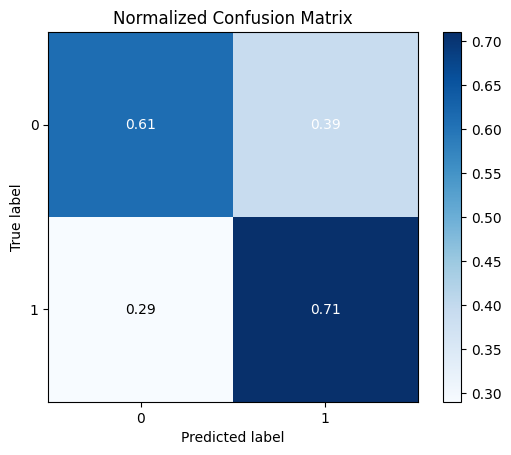

In [21]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())
y_true = test_gen.classes

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names=classes))
scikitplot.metrics.plot_confusion_matrix(y_true, y_pred, normalize=True)

#### **PR Curve**

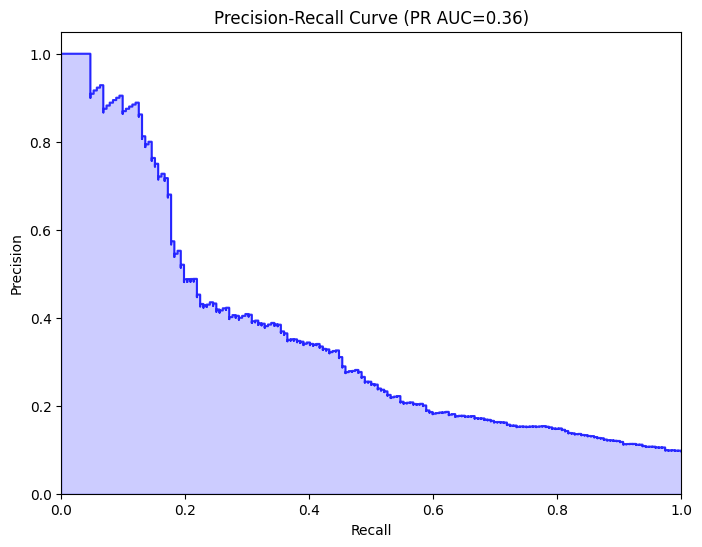

In [22]:
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score

# Make predictions on the test data
y_scores = preds

y_scores = y_scores[:, 1]

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_scores)  # Assuming binary classification, use y_scores[:, 1]

# Calculate AUC for precision-recall curve
pr_auc = auc(recall, precision)

# Alternatively, you can use tf.keras.metrics.AUC directly
pr_auc_metric = tf.keras.metrics.AUC(curve='PR')
pr_auc_metric.update_state(y_true, y_scores)  # Assuming binary classification, use y_scores[:, 1]
pr_auc = pr_auc_metric.result().numpy()

# Visualize the PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.8, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve (PR AUC={pr_auc:0.2f})')
plt.show()

### Plot using scikitplot

<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

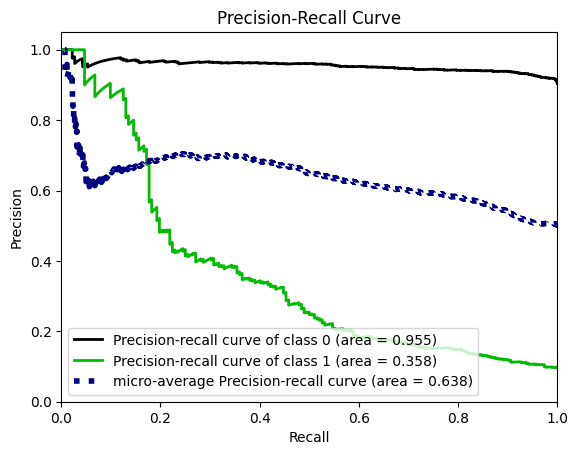

In [23]:
scikitplot.metrics.plot_precision_recall(y_true, preds)